This notebook demonstrates the effect of choices when creating a machine learning pipeline.
It does so by visualising the results of six different pipelines varying the hyperparameters (SVM's $\gamma$) and preprocessing ($\cdots$).

In [1]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn

In [2]:
from helper import make_dataset, plot_svm_surface, plot_estimator_surface

[1, 0, 0, 0, 0] [0, 1, 1, 1, 1]
0 150 300
300 660 600
600 1350 900
900 2040 1200
1200 2550 1500


<AxesSubplot:>

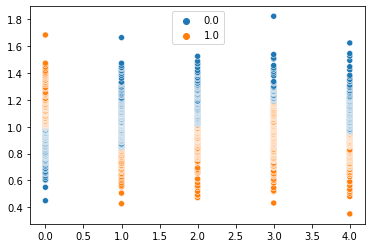

In [3]:
x, y = make_dataset(points=1500)
seaborn.scatterplot(x=x[:, 1], y = x[:, 0], hue=y)

In [10]:
def plot_dataset(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr, marker='.')
    ax.set_title(title)
    ax.set_xlim(0, 2)
    ax.set_ylim(-.2, 4.2)
    ax.set_xticks([0.0, 1.0, 2.0])
    ax.set_yticks([0, 1, 2, 3, 4])
    return ax
    

In [5]:
from collections import Counter

def target_encoder(x, y, encoding_column):
    """ Simplified target encoder (no fuzziness). """
    x = x.copy()
    categories = Counter(x[:, encoding_column])
    mapping = {
        cat: sum(y[x[:, encoding_column] == cat])/count for cat, count in categories.items()
    }
    x[:, encoding_column] = [mapping[v] for v in x[:, encoding_column]]
    return x

[1, 0, 0, 0, 0] [0, 1, 1, 1, 1]
0 75 150
150 330 300
300 675 450
450 1020 600
600 1290 750
dt: [1. 1. 1. 1. 1.]
dt: [1. 1. 1. 1. 1.]
dt: [0. 0. 0. 0. 0.]
dt: [1. 1. 1. 1. 1.]


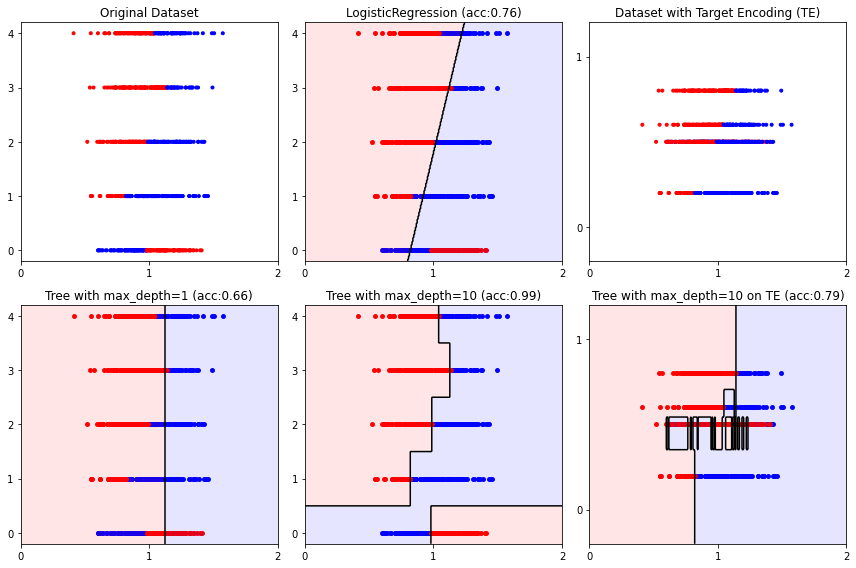

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import LinearSVC
import numpy

nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
splits = StratifiedKFold(shuffle=True)

x, y = make_dataset(points=750, splits=[0.5, 0.2, 0.5, 0.8, 0.6])

plot_dataset(x, y, axes[0, 0], title="Original Dataset")
x_enc = target_encoder(x, y, encoding_column=1)

scores = cross_val_score(LogisticRegression(), x, y, cv=splits)
plot_estimator_surface(LogisticRegression(), x, y, axes[0, 1], title=f"LogisticRegression (acc:{numpy.mean(scores):.2f})")

plot_dataset(x_enc, y, axes[0, 2], title="Dataset with Target Encoding (TE)")
axes[0, 2].set_ylim([-0.2, 1.2])

#scores = cross_val_score(SVC(gamma=1e0), x, y, cv=splits)
# plot_estimator_surface(SVC(gamma=1e0), x, y, axes[1, 0], title=f"SVM with $\gamma$=1 (acc:{numpy.mean(scores):.2f})")
# scores = cross_val_score(SVC(gamma=1e1), x, y, cv=splits)
# plot_estimator_surface(SVC(gamma=1e1), x, y, axes[1, 1], title=f"SVM with $\gamma$=10 (acc:{numpy.mean(scores):.2f})")
scores = cross_val_score(DecisionTreeClassifier(max_depth=1), x, y, cv=splits)
plot_estimator_surface(DecisionTreeClassifier(max_depth=1), x, y, axes[1, 0], title=f"Tree with max_depth=1 (acc:{numpy.mean(scores):.2f})")
scores = cross_val_score(DecisionTreeClassifier(max_depth=10), x, y, cv=splits)
plot_estimator_surface(DecisionTreeClassifier(max_depth=10), x, y, axes[1, 1], title=f"Tree with max_depth=10 (acc:{numpy.mean(scores):.2f})")
scores = cross_val_score(DecisionTreeClassifier(max_depth=10), x_enc, y, cv=splits)
plot_estimator_surface(DecisionTreeClassifier(max_depth=10), x_enc, y, axes[1, 2], title=f"Tree with max_depth=10 on TE (acc:{numpy.mean(scores):.2f})")
axes[1, 2].set_ylim([-0.2, 1.2])
# scores = cross_val_score(LinearSVC(), x, y, cv=splits)
# plot_estimator_surface(LinearSVC(), x, y, axes[3, 0], title=f"LinearSVC (acc:{numpy.mean(scores):.2f})")
# scores = cross_val_score(LogisticRegression(C=1e-1), x, y, cv=splits)
# plot_estimator_surface(LogisticRegression(C=1e-1,max_iter=100), x, y, axes[3, 1], title=f"LogisticRegression (acc:{numpy.mean(scores):.2f})")

# scores = cross_val_score(LogisticRegression(C=1e1,max_iter=1000), x, y, cv=splits)
# plot_estimator_surface(LogisticRegression(C=1e1,max_iter=1000), x, y, axes[4, 1], title=f"LogisticRegression (acc:{numpy.mean(scores):.2f})")
plt.tight_layout()

<AxesSubplot:title={'center':'t'}>

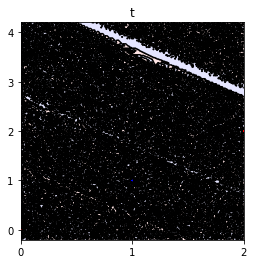

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import LinearSVC
import numpy

nrows, ncols = 1, 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
x = numpy.zeros((150, 2))
x[50:100, :] = 1
x[100:, :] = 2
y = numpy.asarray([0] * 25 + [1] * 25 + [1] * 25 + [0] * 25 + [0] * 25 + [1] * 25)
plot_svm_surface(10, x, y, axes)

In [7]:
x

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.

In [7]:
x[0,:], y[0]

(array([0.55577996, 0.        ]), 1.0)

In [ ]:
plt.figure(figsize=(10, 10))
clf = DecisionTreeClassifier().fit(x, y)
plot_tree(clf, filled=True)
plt.show()

In [ ]:
plot_tree()

<AxesSubplot:title={'center':'Tree with max_depth=5 (acc:0.97)'}, xlabel='x1', ylabel='x2'>

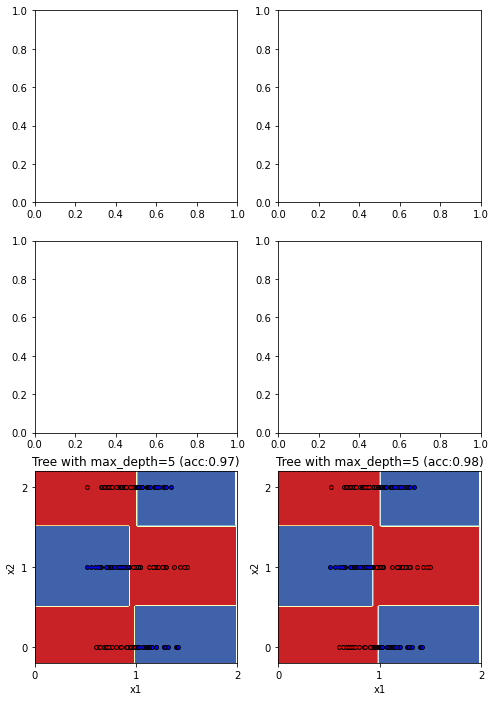

In [170]:
from sklearn.model_selection import StratifiedKFold
nrows, ncols = 3, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
stf = StratifiedKFold(shuffle=True)
scores = cross_val_score(DecisionTreeClassifier(max_depth=5), x, y, cv=stf)
plot_tree_surface(5, x, y, axes[2, 1], title=f"Tree with max_depth=5 (acc:{numpy.mean(scores):.2f})")
scores = cross_val_score(DecisionTreeClassifier(max_depth=5), x, y, cv=stf)
plot_tree_surface(5, x, y, axes[2, 0], title=f"Tree with max_depth=5 (acc:{numpy.mean(scores):.2f})")

In [162]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

def plot_tree_surface(depth, X, y, ax, title):
    # Parameters
    plot_colors = "rb"
    plot_step = 0.02

    # Train
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)
    
    x_min, x_max = -0, 2
    y_min, y_max = -0.2, 2.2
    # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = numpy.meshgrid(
        numpy.arange(x_min, x_max, plot_step), numpy.arange(y_min, y_max, plot_step)
    )
    # plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    # Plot the training points
    for i, color in zip(range(len(set(y))), plot_colors):
        idx = numpy.where(y == i)
        ax.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            #label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
    ax.set_title(title)
    ax.set_xticks([0.0, 1.0, 2.0])
    ax.set_yticks([0, 1, 2])
    return ax
    #plt.suptitle("Decision surface of a decision tree")
    # plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    #plt.axis("tight")
#plot_tree_surface(DecisionTreeClassifier(max_depth=2), dataset[:,:2], dataset[:, -1])
#plt.figure()
#clf = DecisionTreeClassifier().fit(iris.data, iris.target)
#plot_tree(clf, filled=True)
#plt.show()

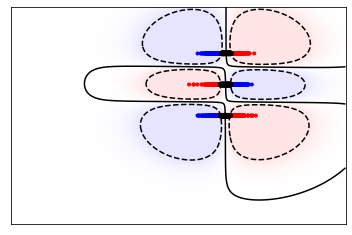

In [106]:
plot_svm_surface(1, x, y, )

In [64]:
def target_encoder(data, encoding_column, target_column = -1):
    enc = data.copy()
    categories = set(data[:, encoding_column])
    print(categories)
    mapping = {
        cat: sum(data[data[:, 1] == cat, -1])/20 for cat in categories
    }
    enc[:, encoding_column] = [mapping[v] for v in enc[:, encoding_column]]
    return enc

{0.0, 1.0, 2.0}


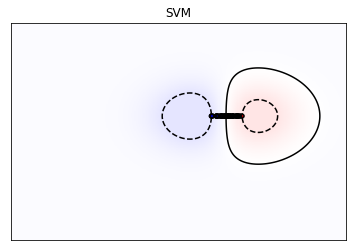

In [67]:
import numpy as np
dataset = target_encoder(dataset, 1, 2)
simple = create_pipeline()
simple.fit(dataset[:,:2], dataset[:,-1])
support_vector_indices = numpy.where((2 * dataset[:,-1] - 1) * simple[-1].decision_function(dataset[:,:2]) <= 1)[0]
support_vectors = dataset[:,:2][support_vector_indices]
plot_svm_kernel(dataset[:,:2], dataset[:,-1], "SVM", support_vectors, simple[-1].decision_function, show=True)

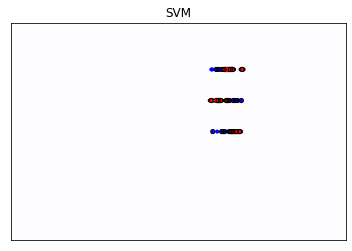

In [57]:
import numpy as np
simple = create_pipeline(gamma=1000)
simple.fit(dataset[:,:2], dataset[:,-1])
support_vector_indices = numpy.where((2 * dataset[:,-1] - 1) * simple[-1].decision_function(dataset[:,:2]) <= 1)[0]
support_vectors = dataset[:,:2][support_vector_indices]
plot_svm_kernel(dataset[:,:2], dataset[:,-1], "SVM", support_vectors, simple[-1].decision_function, show=True)

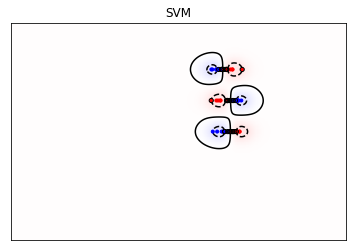

In [63]:
import numpy as np
simple = create_pipeline(gamma=1e1)

plot_svm_kernel(dataset[:,:2], dataset[:,-1], "SVM", support_vectors, simple[-1].decision_function, show=True)

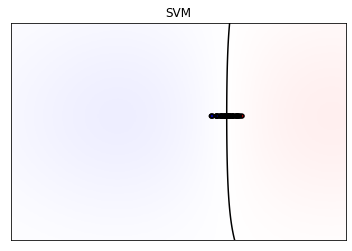

In [71]:
plot_svm_kernel(create_pipeline(gamma=1e-1), dataset[:, :2], dataset[:, -1], "SVM")

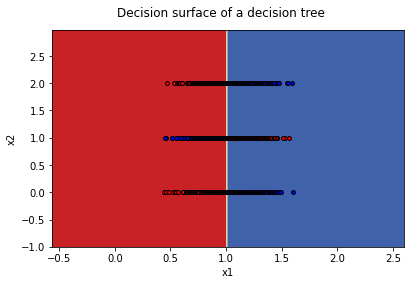